### **Python Analysis - Final Project**
Million Song Dataset (MSD)




# **I. Visualisation des données**



In [2]:
#importation de bibliothèques nécessaires
import numpy as np
import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import resample
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
%matplotlib inline

In [8]:
#importation du dataset MSD présent dans notre dossier drive sans les headers coorrespondants.
# ajout des headers en fonction des données.
header_tab =["Year","TimbreAvg1",	"TimbreAvg2",	"TimbreAvg3",	"TimbreAvg4",	"TimbreAvg5",	"TimbreAvg6",	"TimbreAvg7",	"TimbreAvg8",	"TimbreAvg9",	"TimbreAvg10",	"TimbreAvg11", "TimbreAvg12", "TimberCovariance1", "TimberCovariance2", "TimberCovariance3", "TimberCovariance4", "TimberCovariance5", "TimberCovariance6", "TimberCovariance7", "TimberCovariance8", "TimberCovariance9", "TimberCovariance10", "TimberCovariance11", "TimberCovariance12", "TimberCovariance13", "TimberCovariance14", "TimberCovariance15", "TimberCovariance16", "TimberCovariance17", "TimberCovariance18", "TimberCovariance19", "TimberCovariance20", "TimberCovariance21", "TimberCovariance22", "TimberCovariance23", "TimberCovariance24", "TimberCovariance25", "TimberCovariance26", "TimberCovariance27", "TimberCovariance28", "TimberCovariance29", "TimberCovariance30", "TimberCovariance31", "TimberCovariance32", "TimberCovariance33", "TimberCovariance34", "TimberCovariance35", "TimberCovariance36", "TimberCovariance37", "TimberCovariance38", "TimberCovariance39", "TimberCovariance40", "TimberCovariance41", "TimberCovariance42", "TimberCovariance43", "TimberCovariance44", "TimberCovariance45", "TimberCovariance46", "TimberCovariance47", "TimberCovariance48", "TimberCovariance49", "TimberCovariance50", "TimberCovariance51", "TimberCovariance52", "TimberCovariance53", "TimberCovariance54", "TimberCovariance55", "TimberCovariance56", "TimberCovariance57", "TimberCovariance58", "TimberCovariance59", "TimberCovariance60", "TimberCovariance61", "TimberCovariance62", "TimberCovariance63", "TimberCovariance64", "TimberCovariance65", "TimberCovariance66", "TimberCovariance67", "TimberCovariance68", "TimberCovariance69", "TimberCovariance70", "TimberCovariance71", "TimberCovariance72", "TimberCovariance73", "TimberCovariance74", "TimberCovariance75", "TimberCovariance76", "TimberCovariance77", "TimberCovariance78"]

#music = pd.read_csv("/content/drive/MyDrive/FinalProject_PythonAnalysis/YearPredictionMSD.csv", header=None, names= header_tab)
#si vous n'utilisez pas drive
music = pd.read_csv("YearPredictionMSD.csv", header=None, names= header_tab)


In [9]:
music

,Year,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimberCovariance69,TimberCovariance70,TimberCovariance71,TimberCovariance72,TimberCovariance73,TimberCovariance74,TimberCovariance75,TimberCovariance76,TimberCovariance77,TimberCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [10]:
#Visualisation des 5 premières lignes de données après un tri des chansons par années.
#Observation du type de données.
music.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                515345 non-null  int64  
 1   TimbreAvg1          515345 non-null  float64
 2   TimbreAvg2          515345 non-null  float64
 3   TimbreAvg3          515345 non-null  float64
 4   TimbreAvg4          515345 non-null  float64
 5   TimbreAvg5          515345 non-null  float64
 6   TimbreAvg6          515345 non-null  float64
 7   TimbreAvg7          515345 non-null  float64
 8   TimbreAvg8          515345 non-null  float64
 9   TimbreAvg9          515345 non-null  float64
 10  TimbreAvg10         515345 non-null  float64
 11  TimbreAvg11         515345 non-null  float64
 12  TimbreAvg12         515345 non-null  float64
 13  TimberCovariance1   515345 non-null  float64
 14  TimberCovariance2   515345 non-null  float64
 15  TimberCovariance3   515345 non-nul

## a. Mettre à l'échelle
Toutes les données (sauf years) ont étés mis à l'échelle.

In [11]:
music.iloc[:,1:] = (music.iloc[:,1:]-music.iloc[:,1:].min())/(music.iloc[:,1:].max() - music.iloc[:,1:].min())
music.iloc[:,1:].describe()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimberCovariance69,TimberCovariance70,TimberCovariance71,TimberCovariance72,TimberCovariance73,TimberCovariance74,TimberCovariance75,TimberCovariance76,TimberCovariance77,TimberCovariance78
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,0.691420,0.469220,0.496370,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,0.426704,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,0.064036,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,0.384271,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,0.705890,0.479105,0.499284,0.313357,0.396254,0.284665,0.516247,0.355178,0.477685,0.425735,...,0.349492,0.490235,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,0.468526,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
music = music.sort_values(by=['Year'])
music.head()

,Year,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimberCovariance69,TimberCovariance70,TimberCovariance71,TimberCovariance72,TimberCovariance73,TimberCovariance74,TimberCovariance75,TimberCovariance76,TimberCovariance77,TimberCovariance78
22731,1922,0.737322,0.559067,0.410379,0.305308,0.416069,0.330778,0.533961,0.321855,0.467813,...,0.345080,0.478895,0.367552,0.646362,0.648077,0.471878,0.565566,0.360678,0.507491,0.334406
282630,1922,0.595096,0.246007,0.740020,0.388151,0.439516,0.366189,0.453145,0.397607,0.438521,...,0.337127,0.492347,0.357009,0.644611,0.549755,0.463290,0.612449,0.331603,0.494156,0.364557
22762,1922,0.634632,0.525512,0.434580,0.396172,0.470082,0.441186,0.482734,0.344761,0.473896,...,0.358418,0.472042,0.413838,0.723285,0.557614,0.490380,0.563989,0.391313,0.509687,0.352927
22761,1922,0.652225,0.510642,0.500979,0.381511,0.464501,0.412973,0.515008,0.364310,0.411917,...,0.343204,0.480331,0.338991,0.654120,0.568527,0.486584,0.592945,0.361558,0.491430,0.351731
22759,1922,0.696400,0.522193,0.459988,0.369669,0.449595,0.375708,0.535094,0.386550,0.428299,...,0.331735,0.490194,0.351980,0.671207,0.570774,0.482337,0.592475,0.339357,0.510894,0.352550


In [13]:
#Répartition des musiques sur l'année de sortie
music['Year'].describe()
#Conclusion : Nous pouvons observer que 50% des données récupérées sont situées entre 2002 et 2011 (sur moins de 10 ans !) tandis que l'autre moitié comprend le années 1922 à 2002 (80 ans).

count    515345.000000
mean       1998.397082
std          10.931046
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: Year, dtype: float64

## b. Problématiques de Visualisation
Pour en connaitre plus sur notre dataset nous nous poserons les questions suivantes et y répondrons par différents moyens de visualisation :


1.   Quelle est la répartition du nombre de musiques par année (à quelle point notre base de données sera efficiente pour nos futurs modèles?) ?
2.   Comment sont répartis les différents timbres moyens ? A quoi correspondent-ils?
3. Comment est réparti un timbre moyen sur plusieurs années (100 ans) ?
4. Quelle est la corrélation entre chaque timbre moyen ?
5. Estimation de la corrélation entre timbre et décennie qui nous permettra de nous diriger vers notre problémtique finale : Réussir à définir l'année (décennie) de sortie d'une chanson en fonction des timbres dont elle est constituée.





*Quelle est la répartition du nombre de musiques par année (à quelle point notre base de données sera efficiente pour nos futurs modèles?)?*



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


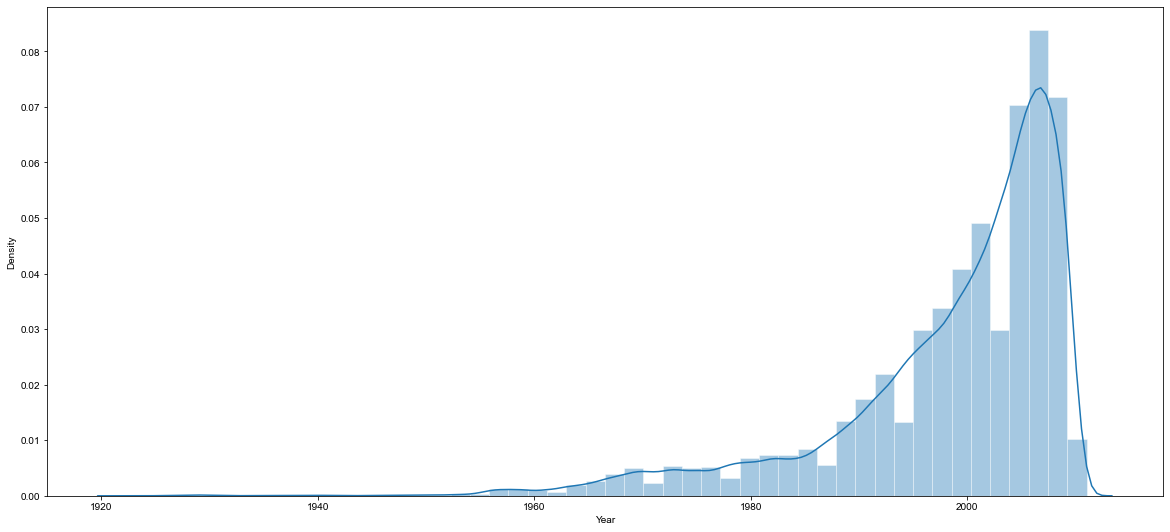

In [15]:
f, ax = plt.subplots(figsize=(20, 9))
ax=sns.set_style('darkgrid')
ax=sns.distplot(music['Year'])

*Réponse : Nous observons que la répartition des musiques récoltées en fonction de leur date de sortie n'est pas uniforme dû à la plus grande production musicale aujourd'hui et sûrement au manque de données récupérées par MSD. Nous verrons si ces différences améneront à des modèles moins efficients.*

Mettre les décenies à la place des année


Suppression des années antérieur à 1940
Car ces données ne sont pas assez représentatives.

In [16]:
music['Year'] = music.Year.apply(lambda i : i-(i%10))

On crée un subset de DataFrame de Music, music_t qui ne contient que les données des années après 1940, et un autre music_sampled qui contient les données des années équivaut au minimum de données parmis les années. Cela est fait pour les futures utilisation dans la création de notre modèle.

In [17]:
music_t = music[music.Year>1940]
min_samples = music_t.Year.value_counts().min()
decades = music_t.Year.unique()
music_sampled = pd.DataFrame(columns=music_t.columns)
for decade in decades:
    music_sampled = music_sampled.append(music_t[music_t.Year==decade].sample(min_samples))
music_sampled.Year = music_sampled.Year.astype(int)
music_sampled.head()


,Year,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimberCovariance69,TimberCovariance70,TimberCovariance71,TimberCovariance72,TimberCovariance73,TimberCovariance74,TimberCovariance75,TimberCovariance76,TimberCovariance77,TimberCovariance78
31191,1950,0.690304,0.389812,0.490541,0.293920,0.338734,0.353250,0.472290,0.293351,0.559152,...,0.355109,0.490280,0.359099,0.646677,0.579020,0.471023,0.598486,0.335157,0.509357,0.363749
14517,1950,0.571519,0.357063,0.549918,0.309194,0.362924,0.342641,0.460577,0.345568,0.515387,...,0.358489,0.471387,0.396191,0.659614,0.571721,0.464048,0.597395,0.341462,0.506946,0.378018
248315,1950,0.599689,0.398092,0.593835,0.323263,0.487585,0.333807,0.428393,0.351990,0.464514,...,0.357132,0.467190,0.365286,0.648451,0.548972,0.459068,0.585359,0.350947,0.493176,0.358452
181102,1950,0.560036,0.263340,0.582662,0.343959,0.348933,0.354895,0.483935,0.401979,0.528672,...,0.378874,0.461747,0.384792,0.630077,0.589540,0.493339,0.611521,0.334463,0.517640,0.377793
209394,1950,0.639071,0.451731,0.497290,0.295504,0.420825,0.410620,0.433065,0.401770,0.454591,...,0.311426,0.502578,0.406856,0.660042,0.558641,0.455635,0.558349,0.358101,0.510461,0.334535


Suppression des covariance 
Pour analyser les corrélations entre timbres seulement 
*Comment sont répartis les différents timbres moyens ? A quoi correspondent-ils?*

In [18]:
musicTimbrAvg = music[["TimbreAvg1", "TimbreAvg2", "TimbreAvg3", "TimbreAvg4","TimbreAvg5", "TimbreAvg6"
              ,"TimbreAvg7","TimbreAvg8","TimbreAvg9","TimbreAvg10","TimbreAvg11","TimbreAvg12"]]
musicTimbrAvg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 515345 entries, 22731 to 365300
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   TimbreAvg1   515345 non-null  float64
 1   TimbreAvg2   515345 non-null  float64
 2   TimbreAvg3   515345 non-null  float64
 3   TimbreAvg4   515345 non-null  float64
 4   TimbreAvg5   515345 non-null  float64
 5   TimbreAvg6   515345 non-null  float64
 6   TimbreAvg7   515345 non-null  float64
 7   TimbreAvg8   515345 non-null  float64
 8   TimbreAvg9   515345 non-null  float64
 9   TimbreAvg10  515345 non-null  float64
 10  TimbreAvg11  515345 non-null  float64
 11  TimbreAvg12  515345 non-null  float64
dtypes: float64(12)
memory usage: 51.1 MB


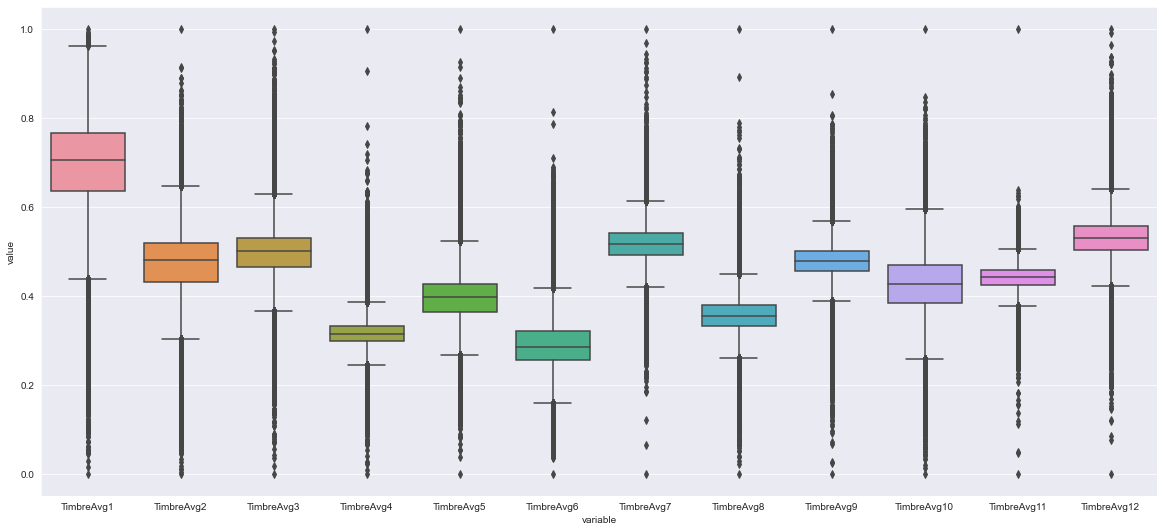

In [19]:
f, ax = plt.subplots(figsize=(20, 9))

ax=sns.boxplot(x="variable", y="value", data=pd.melt(musicTimbrAvg))

plt.show()

*Réponse : Le timbre distingue différents types de production sonore, comme les voix de chœur et les instruments de musique, comme les instruments à cordes, les instruments à vent et les instruments à percussion. Sur le graphique ci-dessus, nous pouvons voir que les timbres utilisés ont des valeurs moyenne proches et sont donc tout aussi présents au travers des années. Leur présence plus ou moins élevée par musique nous permettra sûrement de la caractériser et de lui donner une appartenance à une décennie. Une musique Pop n'aura sûrement  pas les même timbres qu'une musique Jazz, ce qui nous permettra de les différencier. Et même deux musiques de genre Jazz auront quelques différences en fonction de leur décennie de sortie grâce à l'évolution des instruments utilisés.*

*Comment est réparti un timbre moyen sur plusieurs années (100 ans) ?*

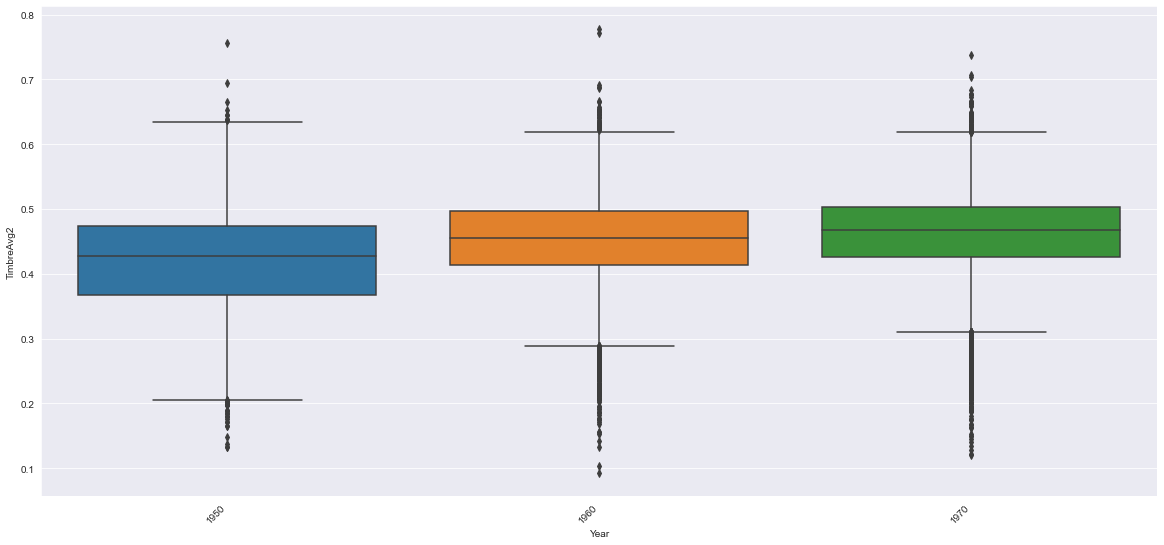

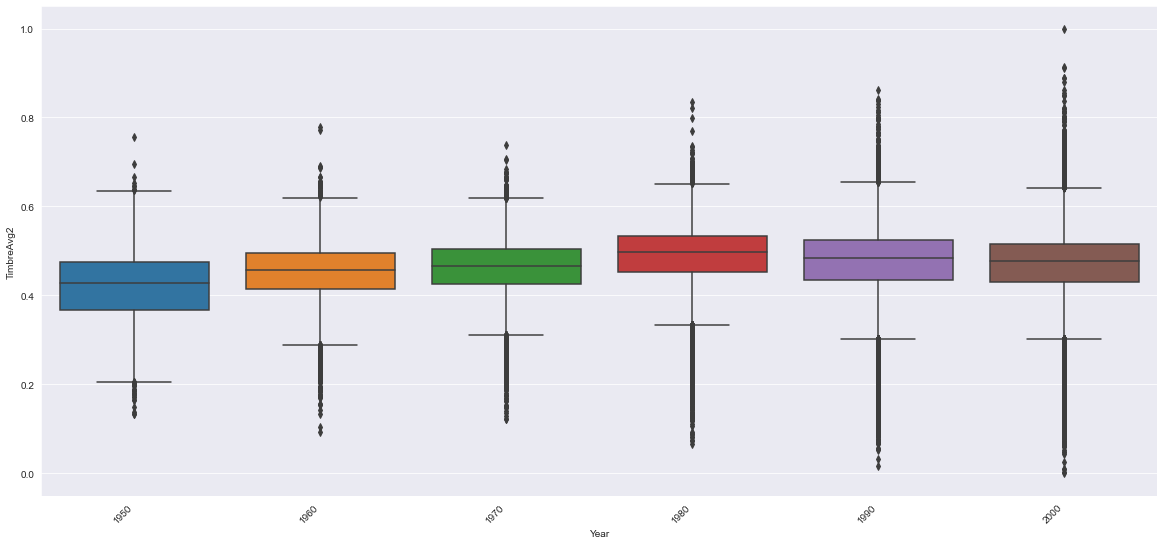

In [20]:
def boxplot(query, y):
    f, ax = plt.subplots(figsize=(20, 9))
    ax = sns.boxplot(x="Year", y=y, data=music_t.query(query))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()
    
boxplot('Year >= 1950 & Year <= 1970', "TimbreAvg2")
boxplot('Year >= 1925 & Year <= 2006', "TimbreAvg2")

*Réponse : La répartition du timbre moyen 2 confirme l'hypothèse que nous avons suggéré lors de la réponse à la question précédente. On observe qu'il est beaucop plus présent dans les dernières sorties musicales et moins avant 1970.
Sa présence est un bon indicateur, mais nous allons devoir vérifier cela pour tous les timbres avec une grille de corrélation.* 

*Quelle est la corrélation entre chaque timbre moyen ?*

<AxesSubplot:>

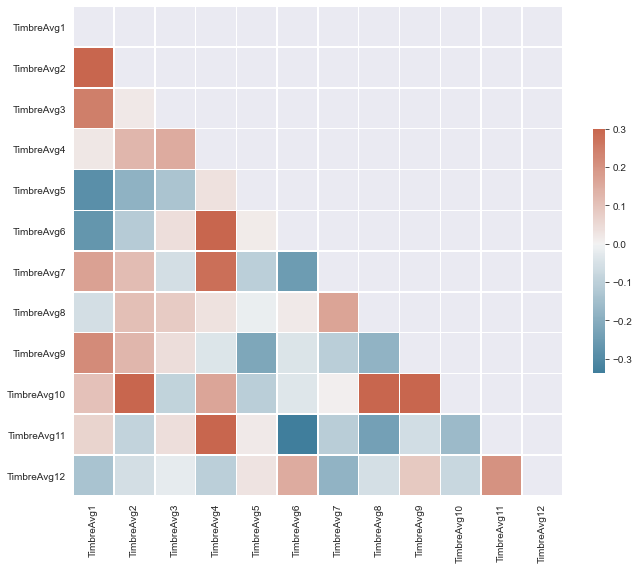

In [21]:
corr=musicTimbrAvg.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

*Réponse : Nous observons qu'il y a effectivement une corrélation entre les différents timbres, et que celle-ci sont disparates.  Nous pouvons faire l'hypothèse qu'une certaine association de timbres sera charactéristique d'une décennie.*

*Estimation de la corrélation entre timbre et décennie qui nous permettra de nous diriger vers notre problémtique finale : Réussir à définir l'année (décennie) de sortie d'une chanson en fonction des timbres dont elle est constituée.*

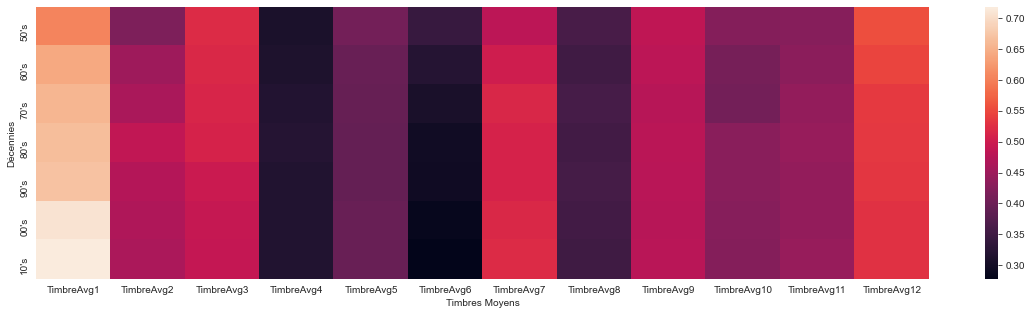

In [22]:
musicTimbrAvg2 = music_t[["Year","TimbreAvg1", "TimbreAvg2", "TimbreAvg3", "TimbreAvg4","TimbreAvg5", "TimbreAvg6"
              ,"TimbreAvg7","TimbreAvg8","TimbreAvg9","TimbreAvg10","TimbreAvg11","TimbreAvg12"]]
columns = musicTimbrAvg2.groupby(['Year']).mean().columns
labels = ["{:02d}'s".format(l%100) for l in sorted(musicTimbrAvg2.Year.unique())]
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(musicTimbrAvg2.groupby(['Year']).mean().iloc[:,0:20], yticklabels=labels)
plt.ylabel("Décennies")
plt.xlabel("Timbres Moyens")
plt.show()

Réponse : Nous voyons de fortes corrélations entre la majorité des timbres et les années. Une alliance entre plusieurs timbres pourront donc effectivement déterminer la décennie d'apartenance d'une musique.

## c. Réduction dimensionnelle pour la visualisation (ACP et T-SNE)

L’ACP constitue la base de l’analyse de données multivariées fondée sur des méthodes de projection. L’utilisation la plus importante de l’ACP est de représenter un tableau de données multivariées en tant que petit ensemble de variables (indices récapitulatifs) afin d’observer les tendances et les valeurs inattendues. Cet aperçu peut révéler les relations entre les observations et les variables, ce qui nous permettra de confirmer les hypothèses que nous avons énoncés lors de notre parcours du questionnaire autour de MSD.

In [23]:
X = music_sampled.iloc[:,1:].values
y = music_sampled.iloc[:,0].values
print("X ", X.shape, ", y ", y.shape)

X  (21714, 90) , y  (21714,)


In [24]:
pca = PCA(n_components=20).fit(X)
X_pca = pca.transform(X)

In [25]:
principal_components = []
samples, features = X_pca.shape
for m in range(1, features+1):
    principal_components.append("Principal Component {}".format(m))
cols = principal_components+["Year"]    
df_pca = pd.DataFrame(np.append(X_pca, y.reshape(samples,1), axis=1), columns=cols)
df_pca["Year"] = df_pca["Year"].astype(int)
print("df_pca.shape = ",df_pca.shape)
print(df_pca)

df_pca.shape =  (21714, 21)
       Principal Component 1  Principal Component 2  Principal Component 3  \
0                  -0.015233              -0.035437              -0.022859   
1                   0.137679              -0.021069              -0.022811   
2                   0.101529              -0.037789              -0.063105   
3                   0.167219              -0.018506               0.031064   
4                   0.085544               0.081410              -0.050969   
...                      ...                    ...                    ...   
21709              -0.059941               0.126703               0.058334   
21710               0.338599               0.417106               0.015812   
21711              -0.188802               0.094902               0.023743   
21712              -0.201943               0.057321               0.084645   
21713              -0.058632              -0.053565               0.104696   

       Principal Component 4  Princ

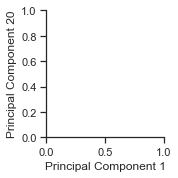

In [72]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_pca,x_vars="Principal Component 1",y_vars="Principal Component 20")

Le graphique ci-dessus ne nous apporte pas de données signicatives et ne nous permet pas de déterminer des groupes d'observation proches.

t-SNE (t-distributed stochastic neighborhood embedding ) est également une technique non supervisée de réduction dimensionnelle non linéaire et de visualisation des données.  Il intègre les points d’une dimension supérieure à une dimension inférieure en essayant de préserver le voisinage de ce point.

Contrairement à l’ACP, elle tente de préserver la structure locale des données en minimisant la divergence Kullback-Leibler (divergence KL) entre les deux distributions en ce qui concerne l’emplacement des points de la carte. 
Ainsi l’ACP permet de visualiser la structure générale des données, et informe sur les variables les plus discriminantes (ce que nous n'observons pas particulièrement sue le graphique ci-dessus). La représentation t-SNE permet, elle, d’identifier les groupes d’observations proches, et allie en quelque sorte à la réduction de dimensionnalité un début de classification automatique.

In [27]:
tsne_samples = df_pca.shape[0]
tsne = TSNE(n_components=2, verbose=2, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(df_pca.iloc[:tsne_samples,:-1])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 21714 samples in 0.002s...
[t-SNE] Computed neighbors for 21714 samples in 20.818s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21714
[t-SNE] Computed conditional probabilities for sample 2000 / 21714
[t-SNE] Computed conditional probabilities for sample 3000 / 21714
[t-SNE] Computed conditional probabilities for sample 4000 / 21714
[t-SNE] Computed conditional probabilities for sample 5000 / 21714
[t-SNE] Computed conditional probabilities for sample 6000 / 21714
[t-SNE] Computed conditional probabilities for sample 7000 / 21714
[t-SNE] Computed conditional probabilities for sample 8000 / 21714
[t-SNE] Computed conditional probabilities for sample 9000 / 21714
[t-SNE] Computed conditional probabilities for sample 10000 / 21714
[t-SNE] Computed conditional probabilities for sample 11000 / 21714
[t-SNE] Computed conditional probabilities for sample 12000 / 21714
[t-SNE] Computed conditional probabilities for s

In [28]:
music_tsne = pd.DataFrame(np.append(tsne_results, 
                                 df_pca.iloc[:tsne_samples,-1].values.reshape(tsne_results.shape[0],1), 
                                 axis=1), 
                       columns=["t-SNE Component 1","t-SNE Component 2","Release Decade"])
music_tsne["Release Decade"] = music_tsne["Release Decade"].astype(int)

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


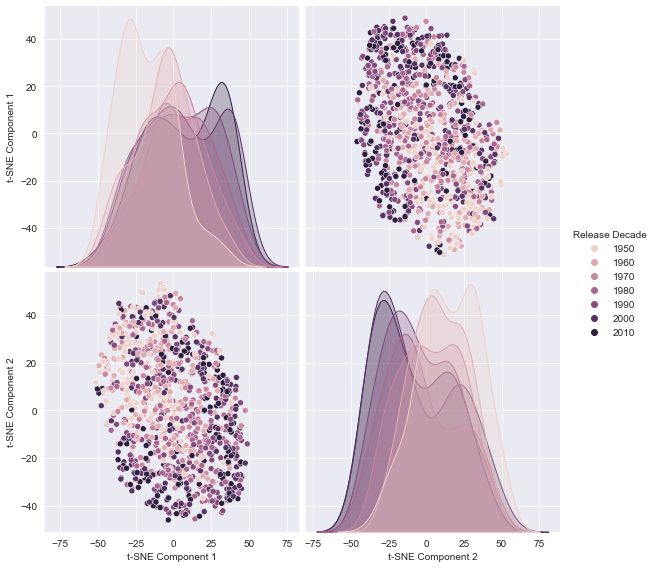

In [29]:
sns.pairplot(data=music_tsne.sample(1000), hue="Release Decade", vars=music_tsne.columns[:-1], size=4)

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


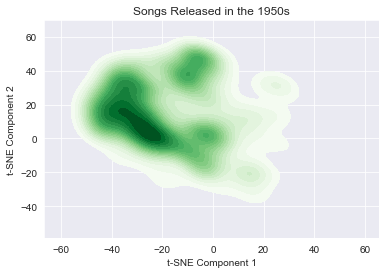

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


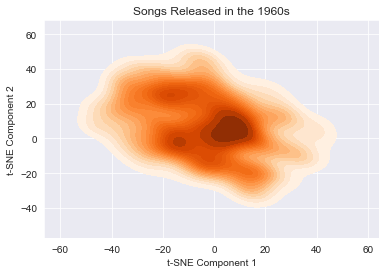

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


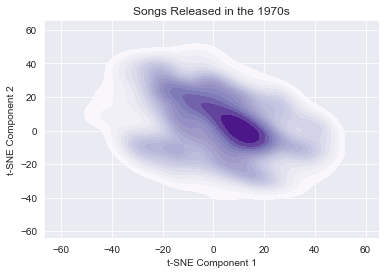

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


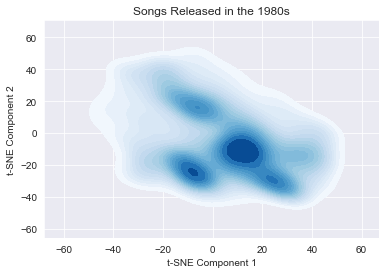

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


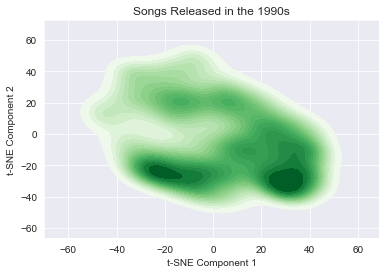

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


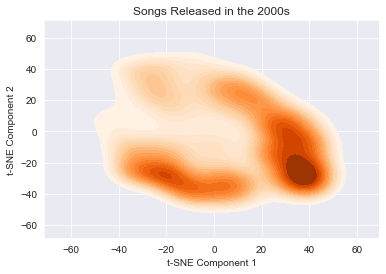

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


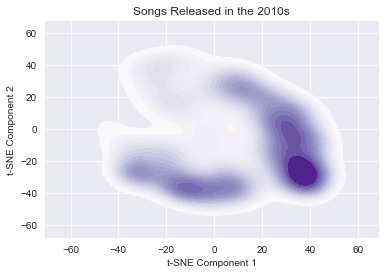

In [31]:
col = ["Greens", "Oranges", "Purples","Blues", "Greens", "Oranges", "Purples"]
for idx, year in enumerate([1950,1960,1970,1980,1990,2000,2010]):
    df_tsne_year = music_tsne[music_tsne['Release Decade']==year]
    sns.kdeplot(df_tsne_year['t-SNE Component 1'].values, df_tsne_year['t-SNE Component 2'].values,cmap=col[idx], shade=True, shade_lowest=False, n_levels=20)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.title("Songs Released in the {}s".format(year))
    plt.show()

Les graphiques que nous avons produits sont significatifs et montrent que par une réduction dimensionnelle, les composantes principales différencient  les chansons par leur année de sortie mais pas avec une grande différence. Quelques détails montrent des ressemblance entre année de sortie, ce qui nous empêche d'identifier avec asssurance l'année de sortie d'une musique.

# II. Classification

Ce que nous essayons de faire ci-dessous est de modifier les hyperparamètres pour obtenir un modèle optimal pour identifier l'année de sortie d'une musique en fonction des timbres qui la composent.

In [32]:
music_sampled = shuffle(music_sampled)
music_train, music_test = train_test_split(music_sampled, test_size=0.3)

In [33]:
X_train = music_train.iloc[:,1:].values 
y_train = music_train.iloc[:,0].values
print("X_train ", X_train.shape, ", y_train ", y_train.shape)

X_train  (15199, 90) , y_train  (15199,)


Après avoir séparé en deux notre dataset nous allons maintenant ajuster le modèle SVC correspondant. L’objectif d’un SVC linéaire est de s’adapter aux données, en renvoyant le meilleur ajustement qui divisera nos données.

In [34]:
clf = svm.SVC(kernel='rbf',C=10,gamma=5);
clf.fit(X_train, y_train)


SVC(C=10, gamma=5)

In [35]:
clf2 = svm.SVC(kernel='rbf',C=12,gamma=4);
clf2.fit(X_train, y_train)


SVC(C=12, gamma=4)

In [36]:
clf3 = svm.SVC(kernel='rbf',C=5,gamma=5);
clf3.fit(X_train, y_train)

SVC(C=5, gamma=5)

In [37]:
tst = music_test
X_test = tst.iloc[:,1:].values 
y_test = tst.iloc[:,0].values
expected = y_test
predicted = clf.predict(X_test)
print("Classification  %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
cnf_matrix = metrics.confusion_matrix(expected, predicted)

Classification  SVC(C=10, gamma=5):
              precision    recall  f1-score   support

        1950       0.62      0.78      0.69       956
        1960       0.47      0.51      0.49       977
        1970       0.46      0.47      0.47       908
        1980       0.52      0.45      0.48       948
        1990       0.39      0.31      0.35       940
        2000       0.36      0.30      0.33       882
        2010       0.46      0.52      0.49       904

    accuracy                           0.48      6515
   macro avg       0.47      0.48      0.47      6515
weighted avg       0.47      0.48      0.47      6515




In [56]:
clf.score(X_test, y_test)


[0.49809319 0.47288628 0.46324763 0.27073711 0.30974185 0.29892625
 0.53673244 0.38314288 0.483776   0.42926734 0.37499611 0.46831022
 0.07275558 0.06527696 0.05966379 0.05863171 0.07338782 0.03493507
 0.04449628 0.07076322 0.07249095 0.08834504 0.04402218 0.04084941
 0.61500064 0.3545356  0.46756031 0.60615403 0.51103042 0.45663871
 0.62598615 0.42943298 0.37952427 0.40925759 0.36180606 0.4253297
 0.3585211  0.56673707 0.60944804 0.47949926 0.56555333 0.5248466
 0.79982468 0.37499571 0.57587375 0.53799625 0.6287079  0.36166264
 0.49617417 0.58042597 0.61909924 0.43263878 0.59169392 0.44366626
 0.73701772 0.43448328 0.28214839 0.26215594 0.39738331 0.29993397
 0.52526795 0.58522346 0.4412592  0.46232536 0.72579866 0.5218967
 0.33660652 0.34388228 0.26457346 0.54166725 0.60875508 0.60577474
 0.79662298 0.52269071 0.54592279 0.47257407 0.5149234  0.39805036
 0.59101435 0.59476678 0.37710508 0.46298685 0.38459633 0.66461925
 0.54890571 0.47364881 0.62301634 0.33730112 0.50683551 0.3824542

In [38]:
predicted = clf2.predict(X_test)
print("Classification %s:\n%s\n"
      % (clf2, metrics.classification_report(expected, predicted)))
cnf_matrix2 = metrics.confusion_matrix(expected, predicted)

Classification SVC(C=12, gamma=4):
              precision    recall  f1-score   support

        1950       0.62      0.78      0.69       956
        1960       0.47      0.51      0.49       977
        1970       0.46      0.47      0.47       908
        1980       0.52      0.44      0.48       948
        1990       0.39      0.30      0.34       940
        2000       0.36      0.30      0.33       882
        2010       0.46      0.54      0.50       904

    accuracy                           0.48      6515
   macro avg       0.47      0.48      0.47      6515
weighted avg       0.47      0.48      0.47      6515




In [39]:
predicted = clf3.predict(X_test)
print("Classification %s:\n%s\n"
      % (clf3, metrics.classification_report(expected, predicted)))
cnf_matrix3 = metrics.confusion_matrix(expected, predicted)

Classification SVC(C=5, gamma=5):
              precision    recall  f1-score   support

        1950       0.61      0.78      0.69       956
        1960       0.47      0.51      0.48       977
        1970       0.46      0.47      0.47       908
        1980       0.52      0.45      0.48       948
        1990       0.40      0.30      0.34       940
        2000       0.37      0.30      0.33       882
        2010       0.47      0.56      0.51       904

    accuracy                           0.48      6515
   macro avg       0.47      0.48      0.47      6515
weighted avg       0.47      0.48      0.47      6515




In [51]:
print(predicted)

[1990 1990 1980 ... 2010 2010 1980]


In [40]:
#mis en commentaire pour son temps d'exécution trop long si l'on veut tout executer en même temps
#grid_search = GridSearchCV(svm.SVC(),
#                           {'kernel':['linear', 'rbf','poly'], 
#                            'C': [1, 5, 10,15,20,25], 
#                            'gamma' : [1, 5, 10,15,20]
 #                          },
 #                          cv=None)
#grid_search.fit(X_train, y_train)
#clf = grid_search.best_estimator_
#print(clf)

Après de multiple tests avec des changements de nos deux hyperparameters,, nous ne voyons pas de grandes différences à l'oeil nu. Les recherches suivies étant trop fastidieuses, nous utilisons la méthode GridSearchCV, qui nous permettra de fixer quels hyperparametres sont les plus optimaux pour ajuster notre modèle.
D'après le résultat, nous utiliserons le modèle clf suivant.

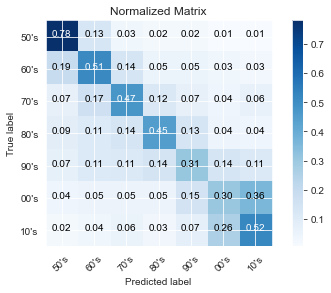

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)
labels = sorted(music_test.Year.unique())


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["{:02d}'s".format(label%100) for label in labels], normalize=True,
                      title='Normalized Matrix')

plt.show()

Nous sommes donc arrivés au bout de notre analyse avec le modèle suivant comprenant les meilleurs hyperparamètres d'après GridSearch.

En conclusion, nous pouvons voir que celui-ci a seulement des chances moyennes de reconnaitre l'année de sortie d'une chanson, si celle-ci est datée des années 90 ou 2000. Celles-ci sont grandement méprises entre elles et avec les années 2010. Les autres décennies sont plus reconnaissables mais n'atteignent pas les résultats escomptés.

Nous pourrions reprocher cela à un manque de données ou des timbres mal choisies pour ce dataset. A moins que les timbres utilisés depuis les années 50 ne se ressemblent trop malgré l'évolution musicale sur ces 70 dernières années.

Nous allons maintenant comparer ce premier modèle avec le modèle XGBClassifier.  XGBoost (comme eXtreme Gradient Boosting) est une implémentation open source optimisée de l’algorithme d’arbres de boosting de gradient. Le Boosting de Gradient est un algorithme d’apprentissage supervisé dont le principe et de combiner les résultats d’un ensemble de modèles plus simple et plus faibles afin de fournir une meilleur prédiction.
Nous reproduisons donc les étapes précédentes pour estimer l'efficacité de ce modèle.

In [44]:
from xgboost import XGBClassifier


In [59]:
algo   = XGBClassifier()
modeleXBG = algo.fit(X_train, y_train)
modeleXBG.score(X_test, y_test)

c:\users\diane\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4406753645433615

Comme nous pouvons le voir l'accurracy de ce modèle est moins élevée, illustrons cela sous forme de matrice afin de comparer visuellement nos deux modèles.

In [60]:
expected = y_test
predicted = modeleXBG.predict(X_test)

In [61]:
XBG_matrix = metrics.confusion_matrix(expected, predicted)

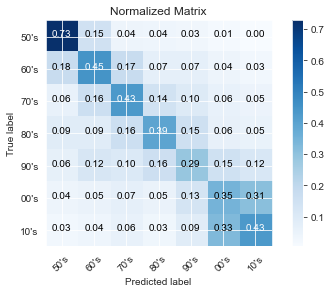

In [64]:
# Compute confusion matrix
np.set_printoptions(precision=2)
labels = sorted(music_test.Year.unique())


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(XBG_matrix, classes=["{:02d}'s".format(label%100) for label in labels], normalize=True,
                      title='Normalized Matrix')

plt.show()

Nous observons que pour certains cas, le modèle XGBboost est plus efficace mais comme en témoignent l'accuracy nous opterons pour le premier modèle dans l'ensemble.
Pour pouvoir créer notre API, nous exportons les modèles sous forme de pickles, afin de les tester en direct.
Dans l'ensemble nous concluerons que le dataset n'est pas assez pourvu pour définir l'année de sortie d'une musique ou que les variables explicatives ne sont pas liées à la variable de prédiction.

In [57]:
import pickle
pickle.dump(clf, open('final_prediction_clf.pickle', 'wb'))

In [58]:
import pickle
pickle.dump(clf, open('final_prediction_XGB.pickle', 'wb'))